In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data_updated.csv')

In [3]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Hour'] = df['Time'].dt.hour


In [4]:
hourly_delays = df.groupby('Hour')['Min Delay'].sum()

In [5]:
mean_delay = hourly_delays.mean()
max_delay = hourly_delays.max()
min_delay = hourly_delays.min()

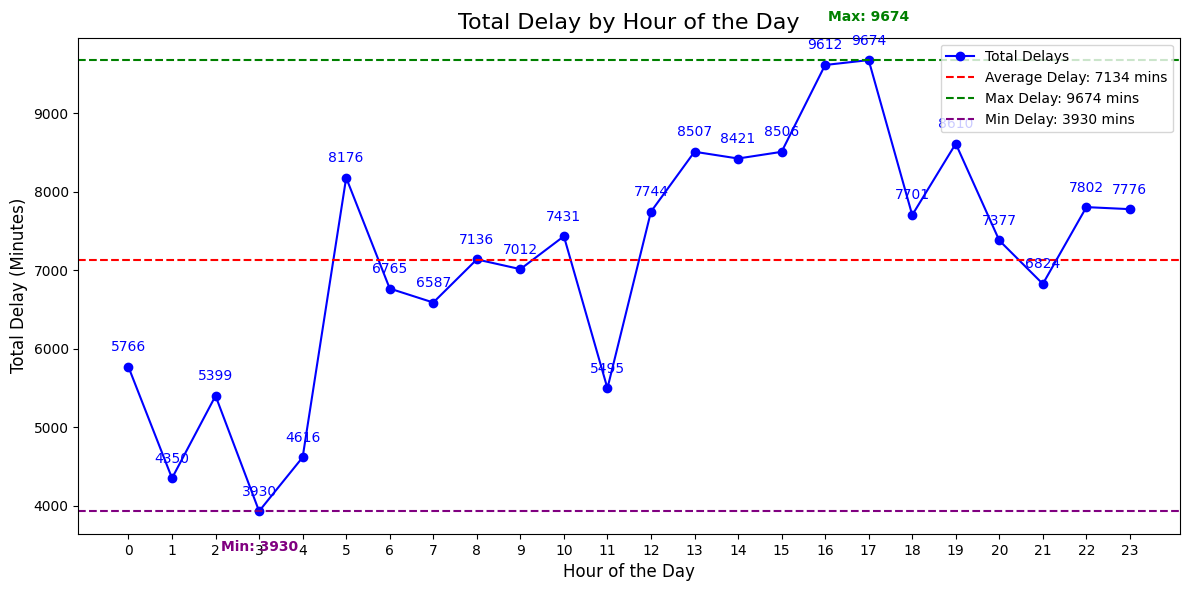

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(hourly_delays.index, hourly_delays.values, marker='o', color='blue', label='Total Delays')
plt.axhline(mean_delay, color='red', linestyle='--', label=f'Average Delay: {mean_delay:.0f} mins')
plt.axhline(max_delay, color='green', linestyle='--', label=f'Max Delay: {max_delay:.0f} mins')
plt.axhline(min_delay, color='purple', linestyle='--', label=f'Min Delay: {min_delay:.0f} mins')

for hour, delay in hourly_delays.items():
    plt.text(hour, delay + 200, f'{delay:.0f}', color='blue', ha='center', fontsize=10)

for hour, delay in hourly_delays.items():
    if delay == max_delay:
        plt.text(hour, delay + 500, f'Max: {delay:.0f}', color='green', ha='center', fontsize=10, weight='bold')
    elif delay == min_delay:
        plt.text(hour, delay - 500, f'Min: {delay:.0f}', color='purple', ha='center', fontsize=10, weight='bold')

plt.title('Total Delay by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Delay (Minutes)', fontsize=12)
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.savefig('plots/total_delay_by_hour_adjusted.png')
plt.show()